# colab 한글 깨짐 방지
- 실행후에 런타임 다시 시작할 것

In [1]:
# !apt -qq -y install fonts-nanum > /dev/null

# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import seaborn as sns

# sns.set_theme(style="darkgrid")

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=fontpath).get_name()
# # fm._rebuild()


# %config InlineBackend.figure_format = 'retina'

# plt.rc('font', family=font_name)
# plt.rcParams['axes.unicode_minus'] = False

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 35s (295 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and direc

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

# 앤스콤 4분할 그래프(Anscombe's quartet)
> Frank Anscombe이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프  
> - 앤스콤 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있다.
> - 4개의 데이터 그룹은 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 모두 같다.
> - 이런 결과를 통해 4개의 데이터 그룹이 모두 같을 것이라고 착각을 할 수 있다.

### 4개의 그룹 데이터 로드

In [4]:
anscombe = sns.load_dataset("anscombe")

anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [5]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [6]:
anscombe.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [7]:
anscombe['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [8]:
anscombe['dataset'] == 'I'

,dataset
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [9]:
anscombe['dataset']

,dataset
0,I
1,I
2,I
3,I
4,I
5,I
6,I
7,I
8,I
9,I


In [10]:
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [11]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

## 통계 데이터 확인

In [12]:
grouped = anscombe.groupby(['dataset', 'x'])

for key, group in grouped:
  print("* key", key)
  print("* count", len(group))
  print(group.head())
  print('\n')

* key ('I', 4.0)
* count 1
  dataset    x     y
7       I  4.0  4.26


* key ('I', 5.0)
* count 1
   dataset    x     y
10       I  5.0  5.68


* key ('I', 6.0)
* count 1
  dataset    x     y
6       I  6.0  7.24


* key ('I', 7.0)
* count 1
  dataset    x     y
9       I  7.0  4.82


* key ('I', 8.0)
* count 1
  dataset    x     y
1       I  8.0  6.95


* key ('I', 9.0)
* count 1
  dataset    x     y
3       I  9.0  8.81


* key ('I', 10.0)
* count 1
  dataset     x     y
0       I  10.0  8.04


* key ('I', 11.0)
* count 1
  dataset     x     y
4       I  11.0  8.33


* key ('I', 12.0)
* count 1
  dataset     x      y
8       I  12.0  10.84


* key ('I', 13.0)
* count 1
  dataset     x     y
2       I  13.0  7.58


* key ('I', 14.0)
* count 1
  dataset     x     y
5       I  14.0  9.96


* key ('II', 4.0)
* count 1
   dataset    x    y
18      II  4.0  3.1


* key ('II', 5.0)
* count 1
   dataset    x     y
21      II  5.0  4.74


* key ('II', 6.0)
* count 1
   dataset    x     y
17  

In [13]:
anscombe[['x','y']].head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


In [14]:
anscombe.groupby(['dataset'])[['x', 'y']].agg(['mean', 'std', 'var']) # 평균, 표준편차, 분산

x                         y                    
        mean       std   var      mean       std       var
dataset                                                   
I        9.0  3.316625  11.0  7.500909  2.031568  4.127269
II       9.0  3.316625  11.0  7.500909  2.031657  4.127629
III      9.0  3.316625  11.0  7.500000  2.030424  4.122620
IV       9.0  3.316625  11.0  7.500909  2.030579  4.123249

## 데이터 시각화 확인

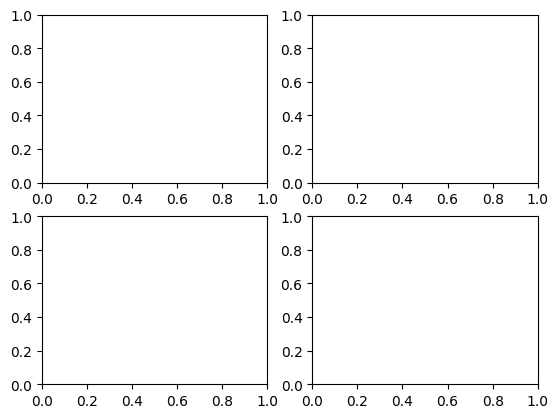

In [15]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

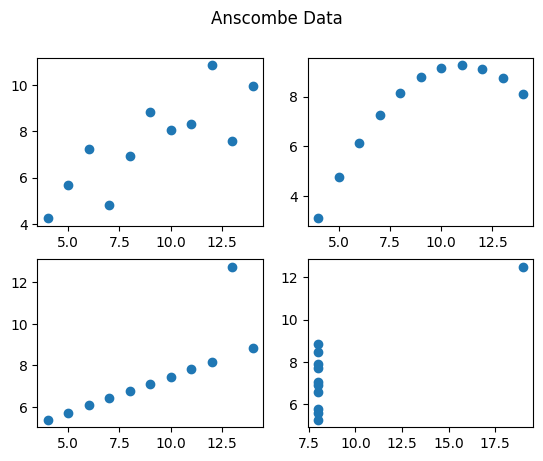

In [16]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig.suptitle("Anscombe Data")
fig

# 데이터 시각화를 해야 하는 이유
> 데이터를 주제로 다룬 기사 가운데 '데이터 활용 능력'의 중요성을 강조하는 내용을 종종 볼 수 있습니다. 핵심은 얼마나 많은 양의 데이터를 보유하고 있느냐가 중요한 것이 아니라, 어떻게 활용할 것인가에 대한 답을 가졌는지 그 여부가, 데이터를 기반으로 한 가치 창출의 키라는 것입니다.    

> '데이터 활용 역량'이라 하면 크게 두 가지를 떠올릴 수 있습니다. '데이터 분석'과 '시각적 스토리텔링'입니다.
> - '데이터 분석'은 기술적으로 데이터를 수집하고 정제하는 데이터 가공 단계부터 분석 기법을 활용한 데이터 분석에 이르는 과정에 필요한 능력을 말합니다.  
> - '시각적 스토리텔링'은 데이터 분석 결과를 시각적으로 표현해 스토리텔링을 하는 능력입니다.   
  
과거에는 이 두 역량 간 경계가 뚜렷했던 반면, 최근에는 두 역량을 아우르는 '데이터 시각화'의 중요성이 강조되고 있습니다.



## 데이터 시각화의 장점들

### 많은 양의 데이터를 한눈에 볼 수 있다.

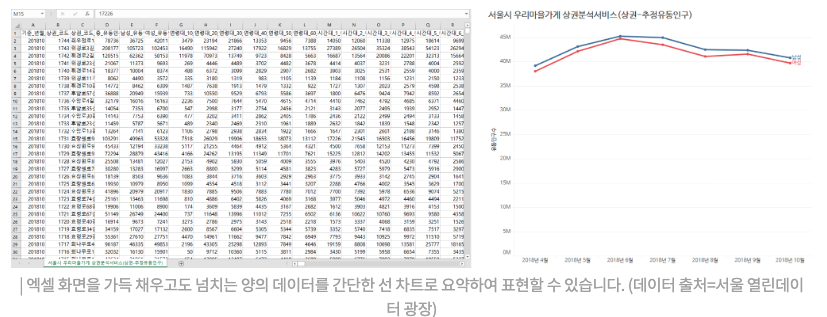

### 데이터 분석에 대한 전문 지식이 없어도, 누구나 쉽게 데이터 인사이트를 찾을 수 있다.
> 데이터 시각화 차트에서 시각화 요소의 형태, 크기, 위치나 색을 근거로 시각적 패턴을 찾을 수 있으며, 이를 통해 인사이트를 얻을 수 있다.

### 요약 통계보다 정확한 데이터 분석 결과를 도출할 수 있다.
> 앤스콤 데이터와 같이 때로는 요약 통계보다 정확한 데이터 분석 결과를 얻을 수 있다.

In [17]:
anscombe.groupby('dataset')[['x','y']].agg(['mean', 'std', 'var'])

x                         y                    
        mean       std   var      mean       std       var
dataset                                                   
I        9.0  3.316625  11.0  7.500909  2.031568  4.127269
II       9.0  3.316625  11.0  7.500909  2.031657  4.127629
III      9.0  3.316625  11.0  7.500000  2.030424  4.122620
IV       9.0  3.316625  11.0  7.500909  2.030579  4.123249

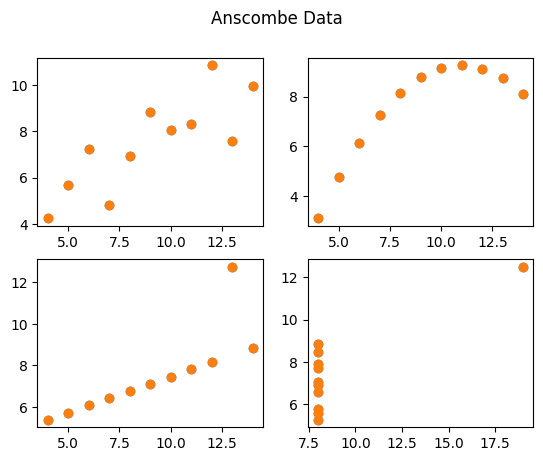

In [18]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig.suptitle("Anscombe Data")
fig

### 효과적인 데이터 인사이트 공유로 데이터 기반의 의사결정을 할 수 있다.
> 프레젠테이션 문서 등을 통해 효과적으로 인사이트를 전달할 수 있다.

# Auto ViML

## [sweetviz](https://www.kaggle.com/code/hwangchanghyun/sweetviz-auto-visualization-library-for-you)

In [23]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 59.8 MB/s eta 0:00:00


In [24]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=11757281 sha256=3eb9d03c004b17f55a2dcbc2444ebac61d9179938f23be30d91fade5885687b5
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3

In [6]:
import sweetviz as sv

In [1]:
import seaborn as sns

df = sns.load_dataset('titanic') # 타이타닉 데이터 받아오기

In [7]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class']]
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class'],
      dtype='object')

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third


In [9]:
feature_config = sv.FeatureConfig(skip="fare", force_text=["age"])

In [10]:
my_report = sv.analyze(df, feat_cfg=feature_config)

                                             |          | [  0%]   00:00 -> (? left)


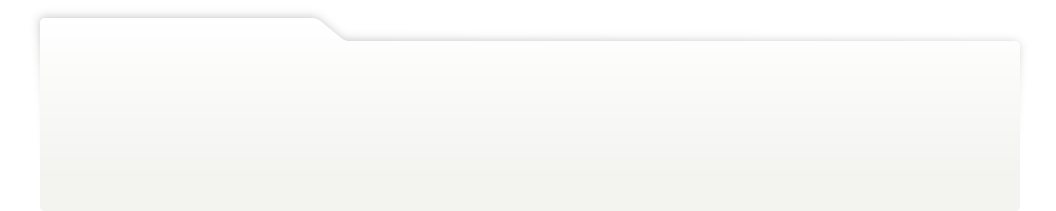
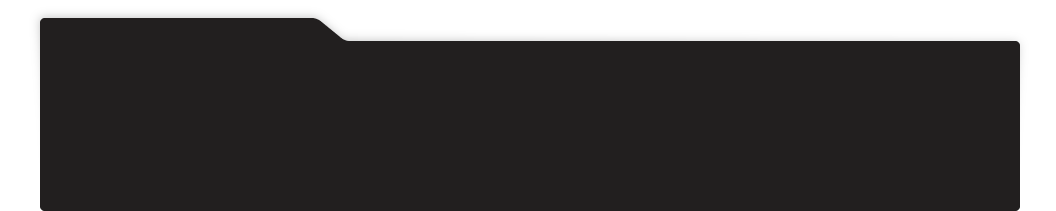
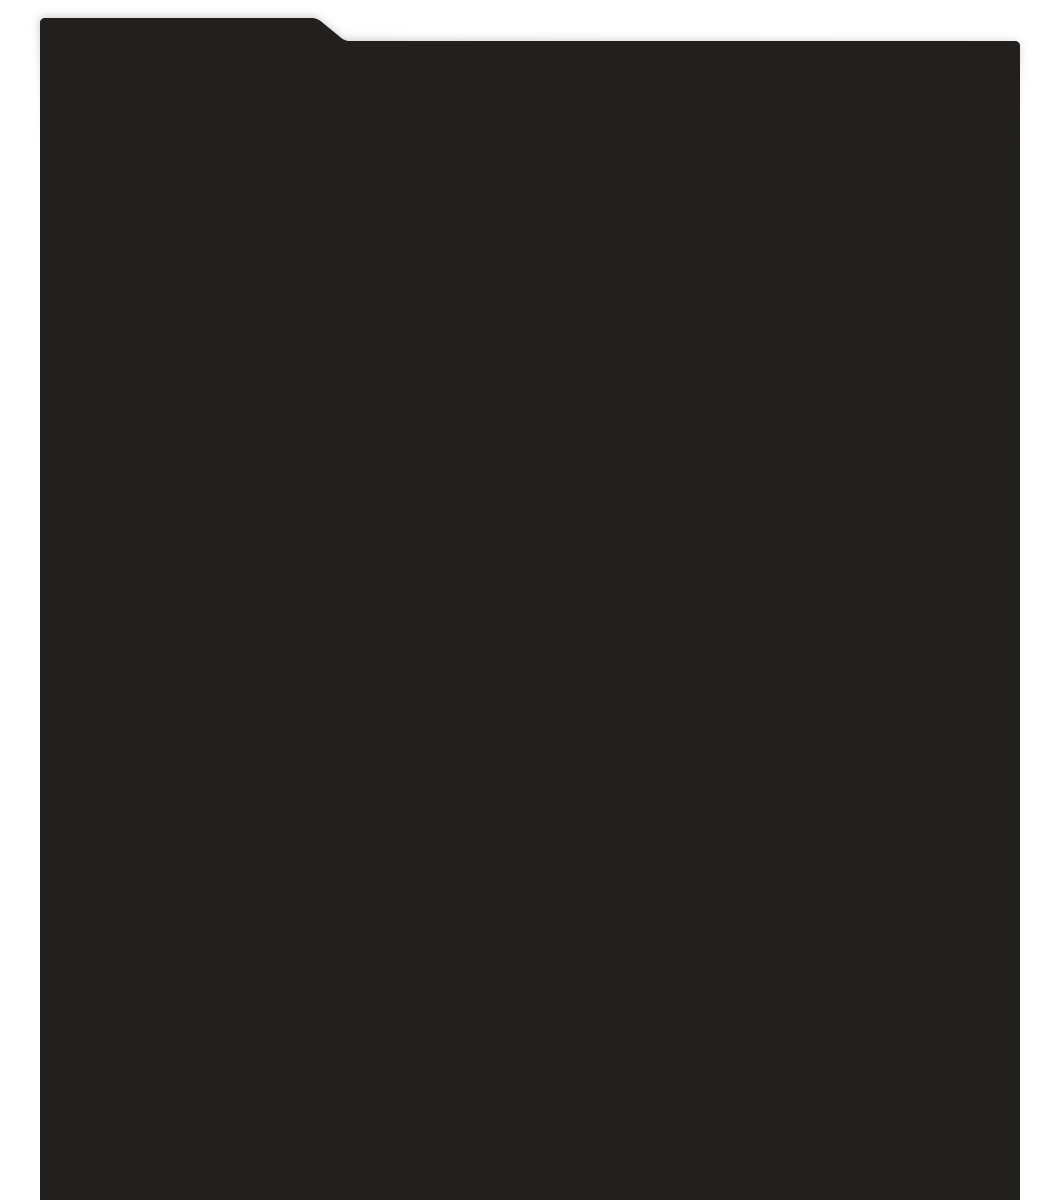
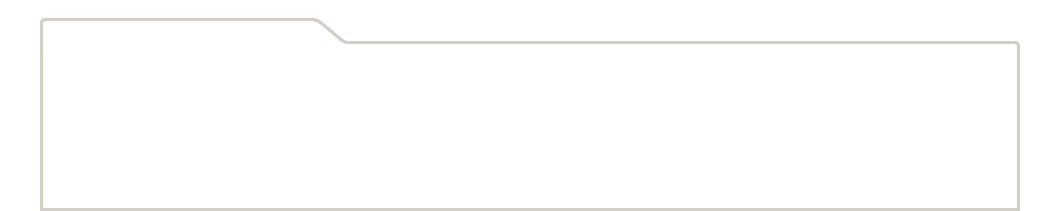
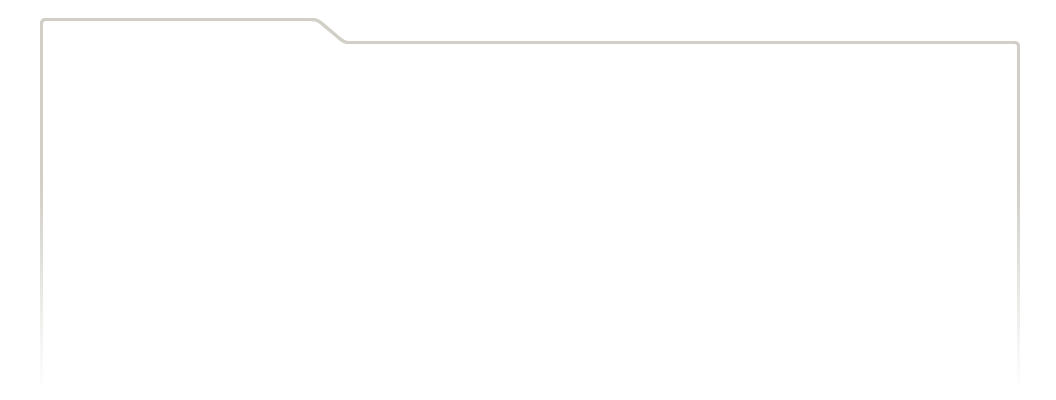
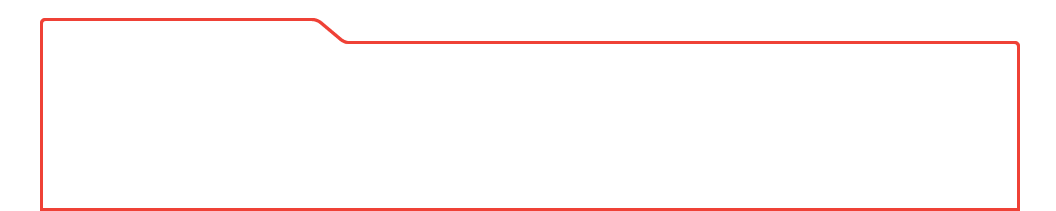
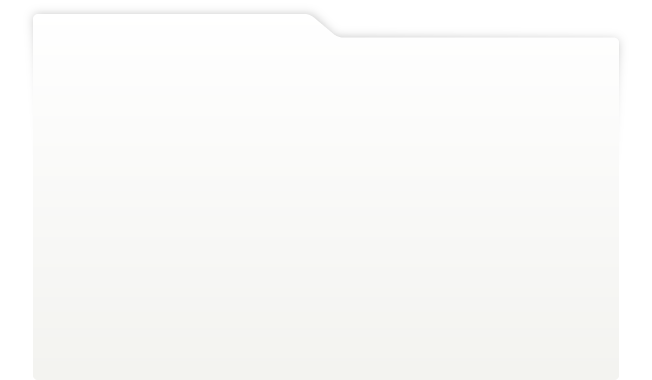
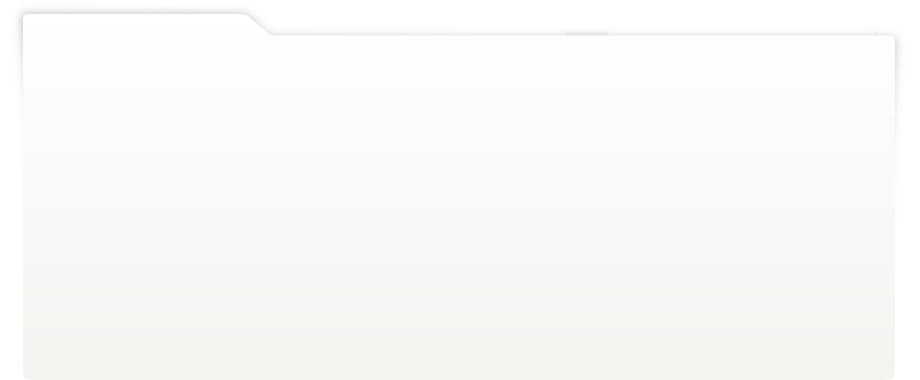
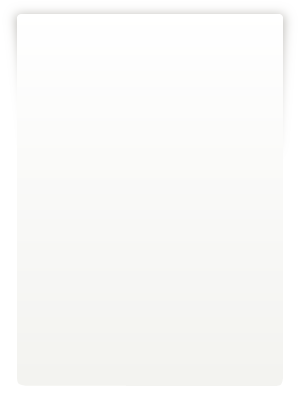
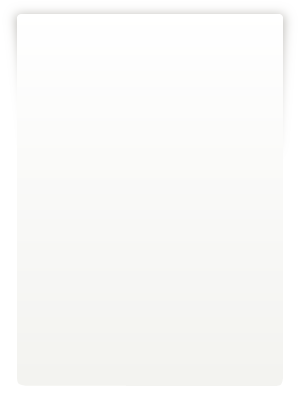
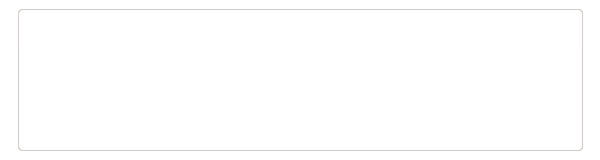
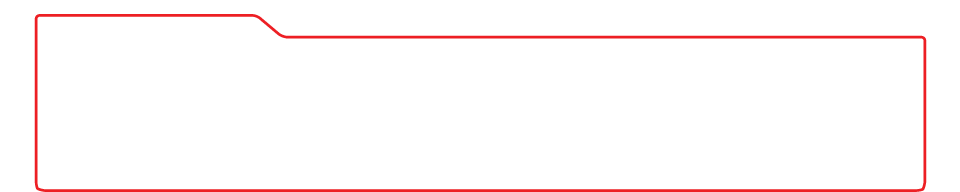
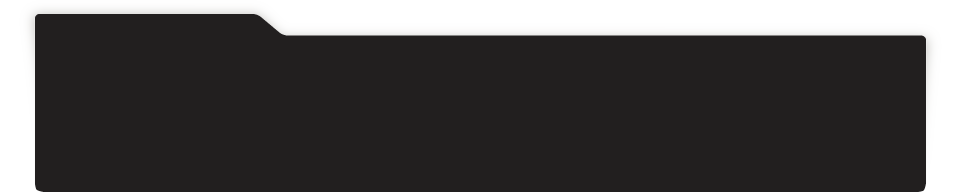
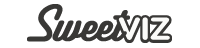
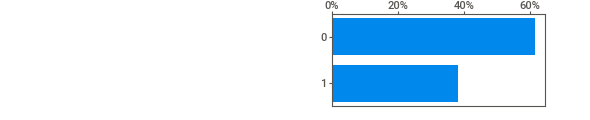
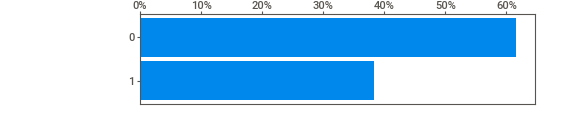
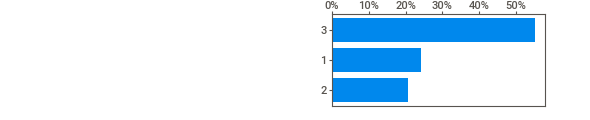
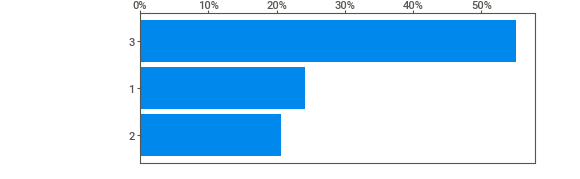
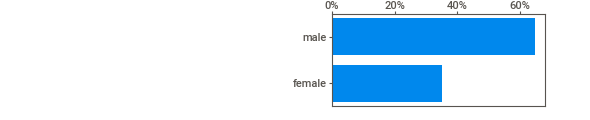
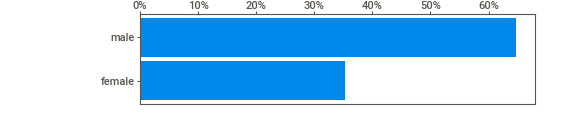
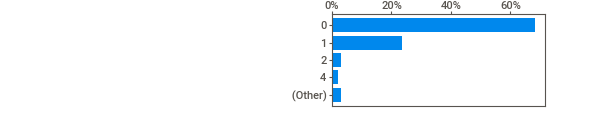
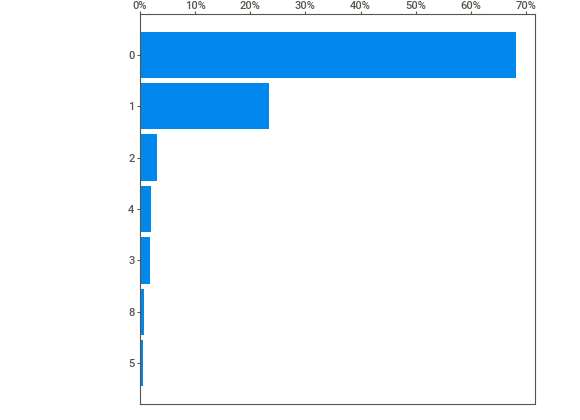
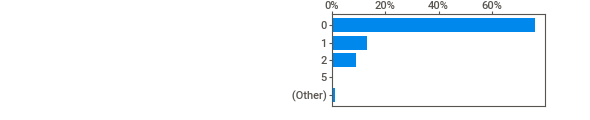
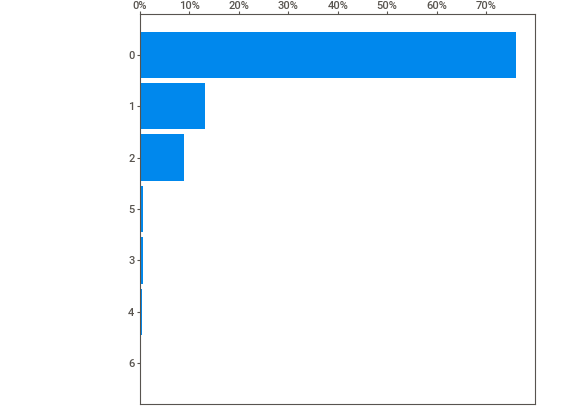
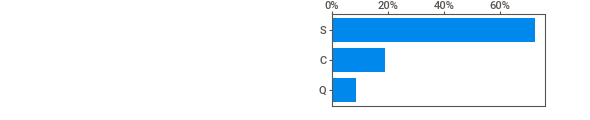
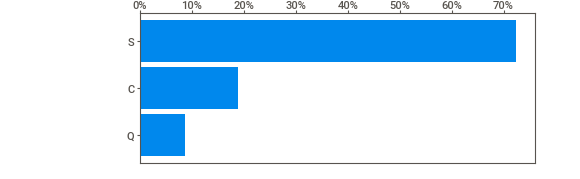
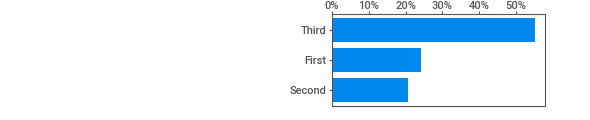
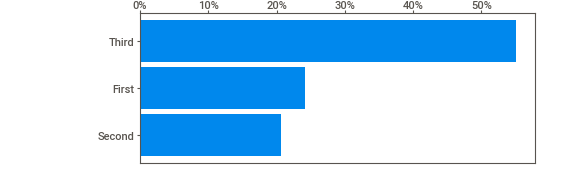
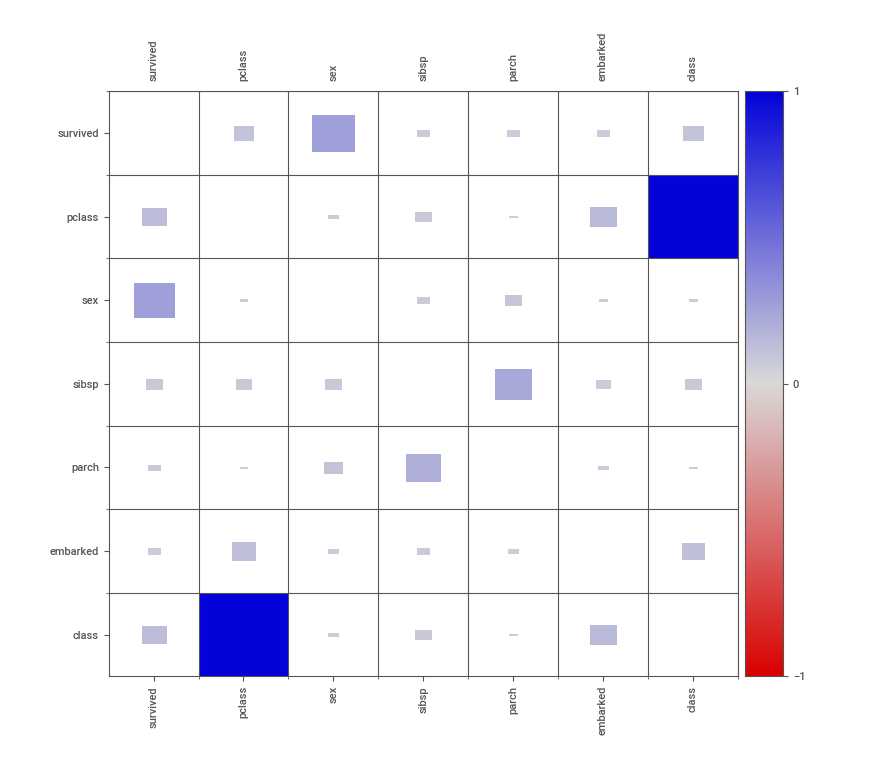
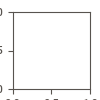

In [11]:
my_report.show_notebook(scale=0.9)

In [19]:
my_report = sv.compare_intra(df, df["sex"] == "male", ["male", "female"],'survived', feature_config)

                                             |          | [  0%]   00:00 -> (? left)


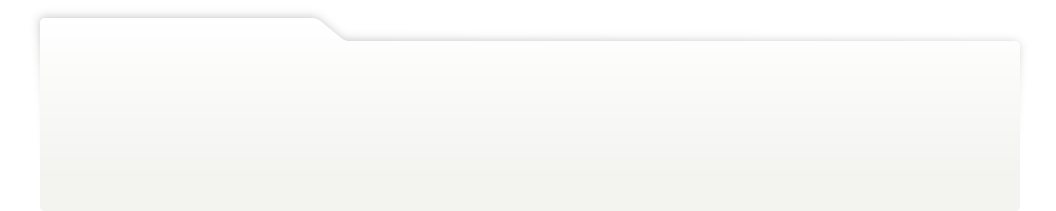
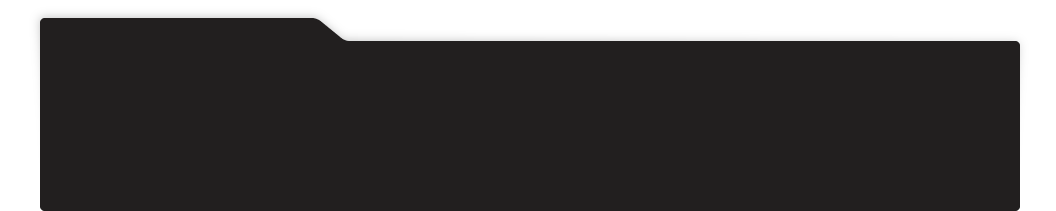
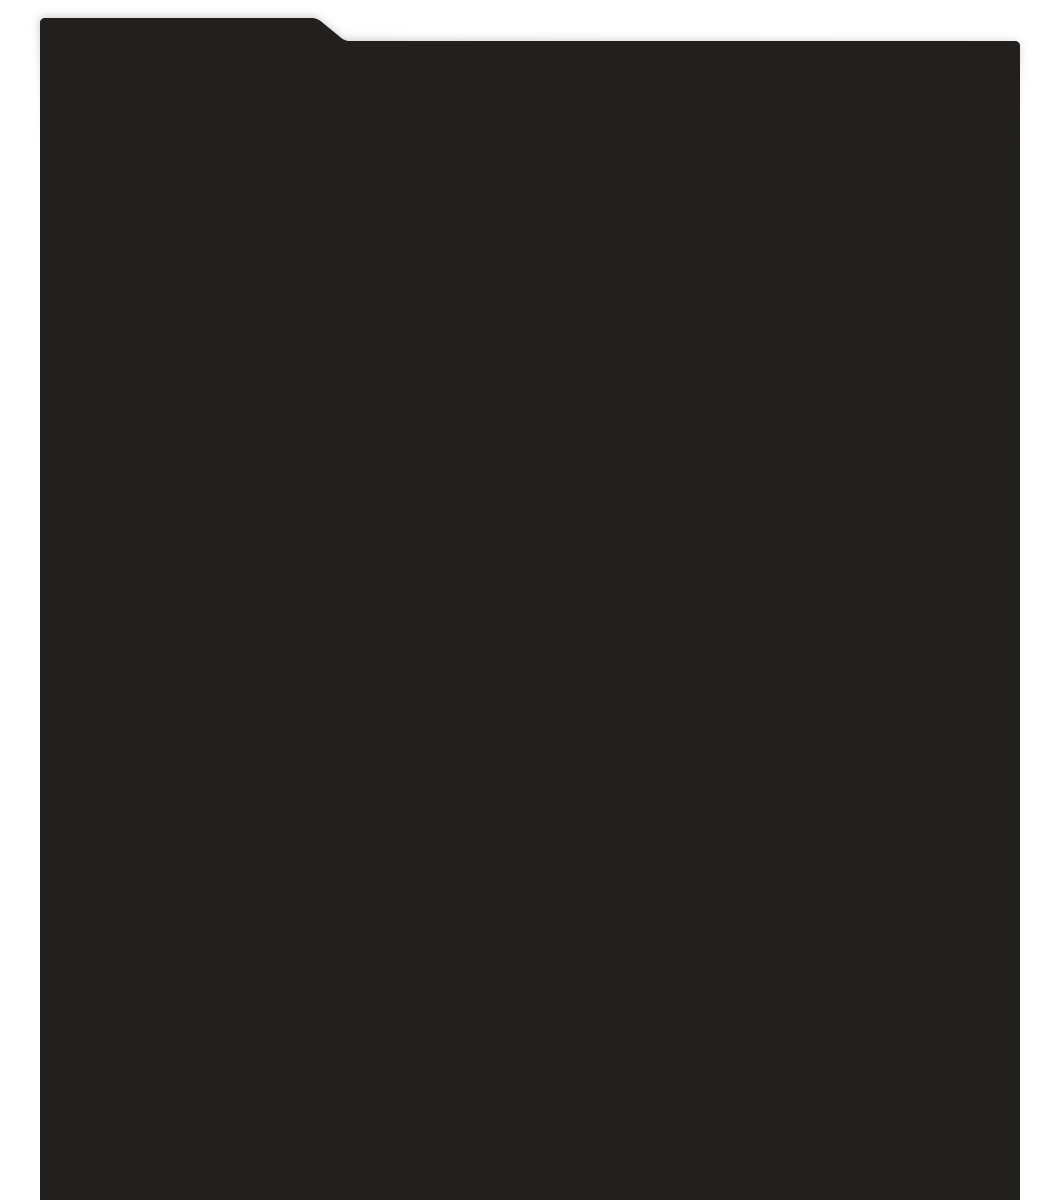
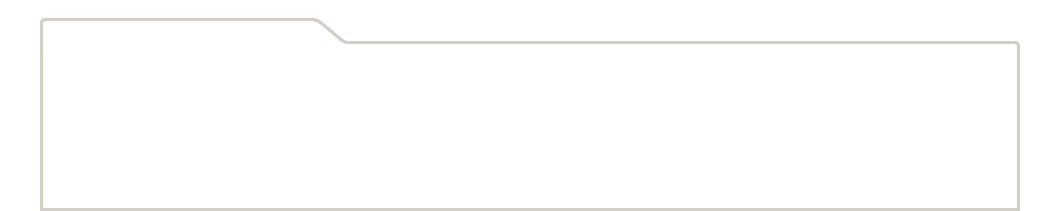
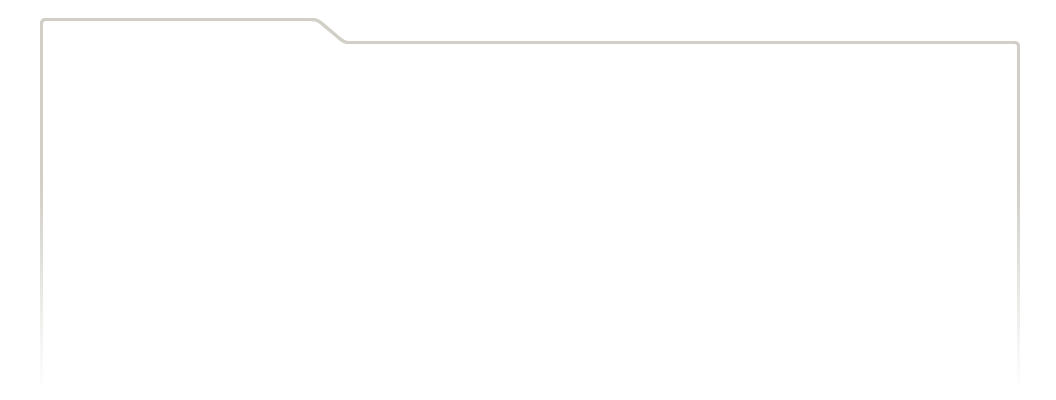
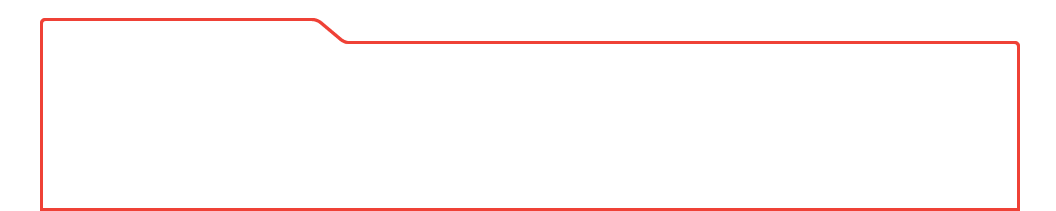
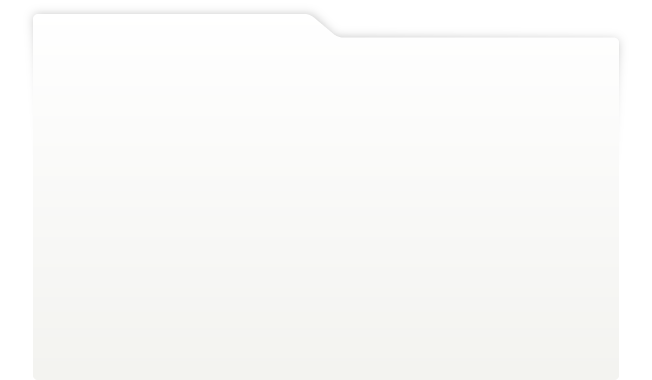
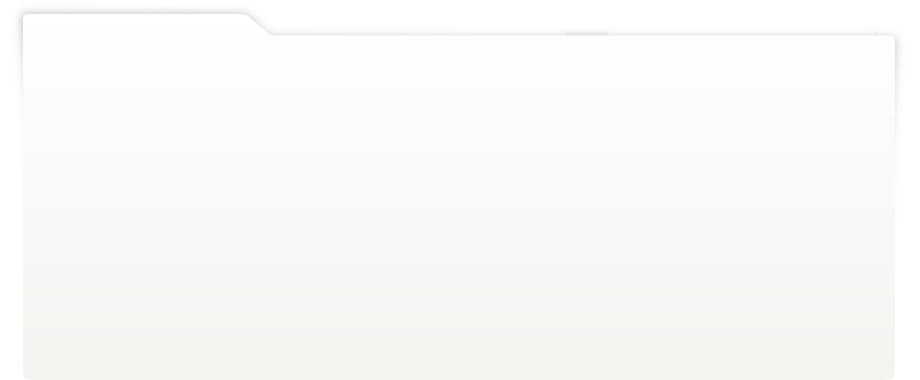
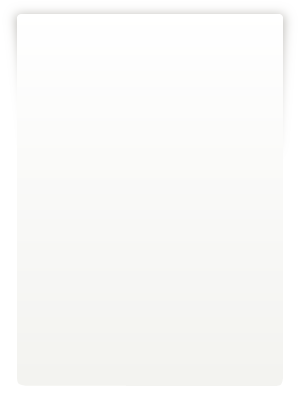
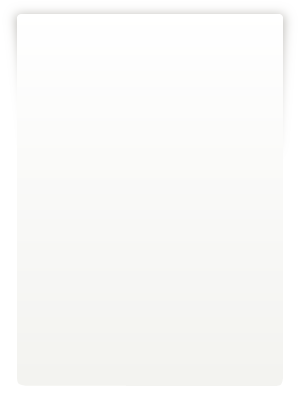
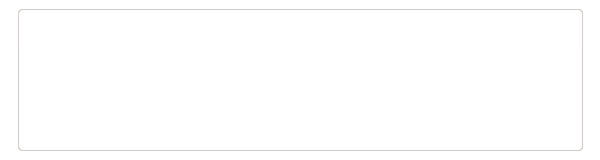
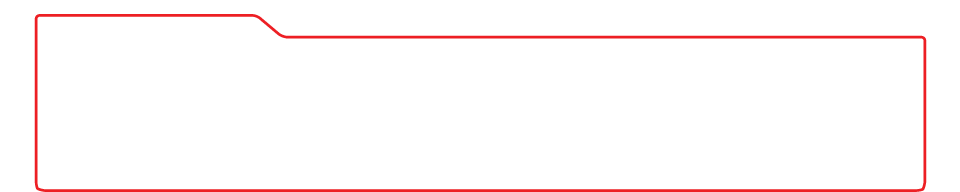
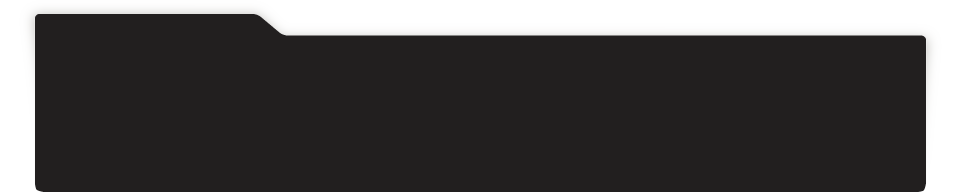
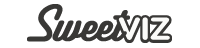
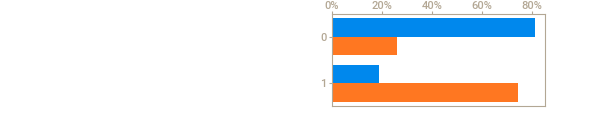
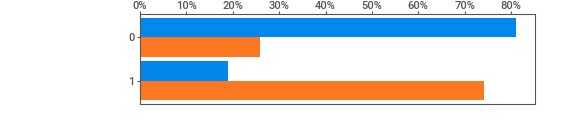
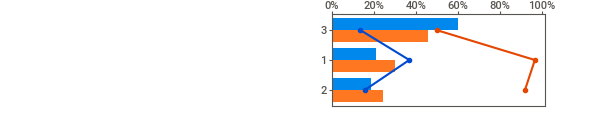
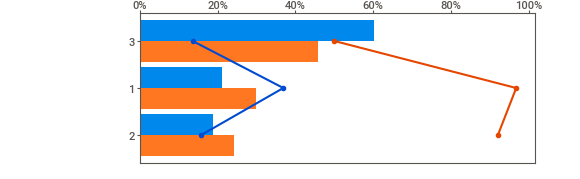
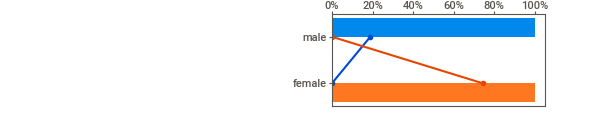
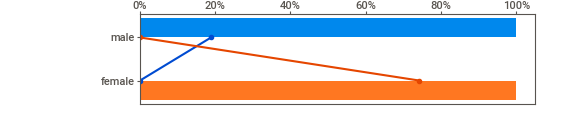
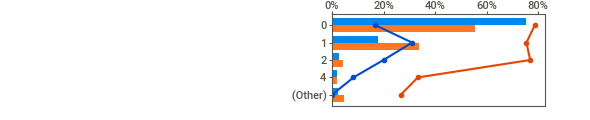
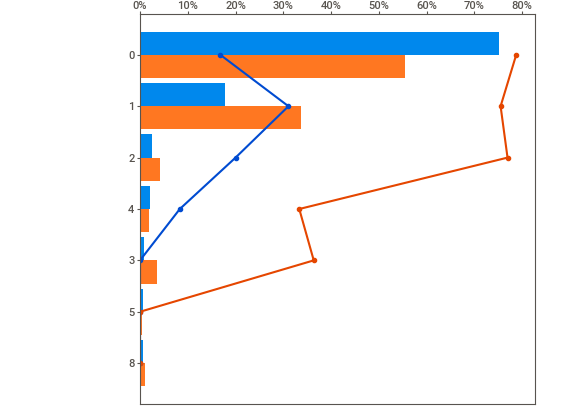
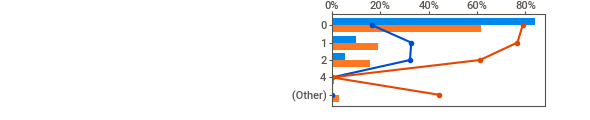
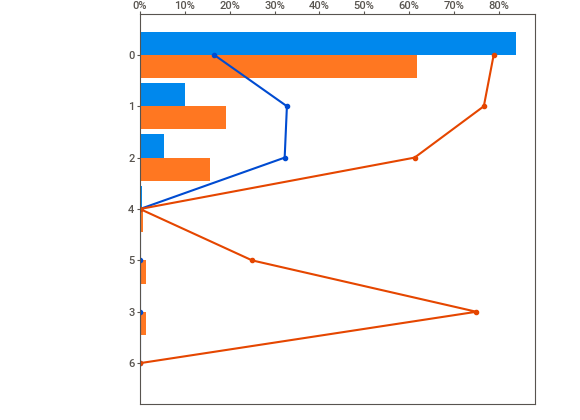
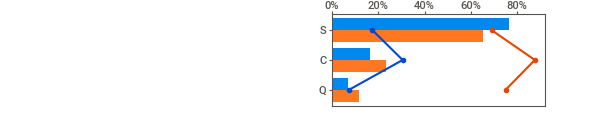
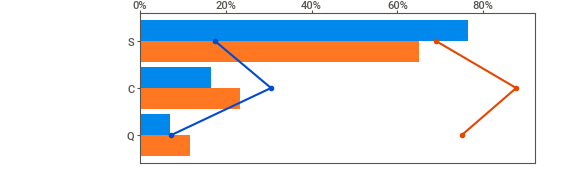
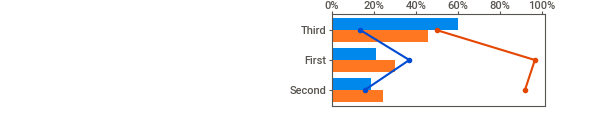
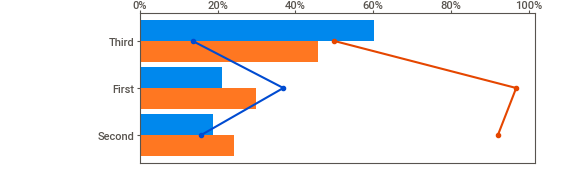
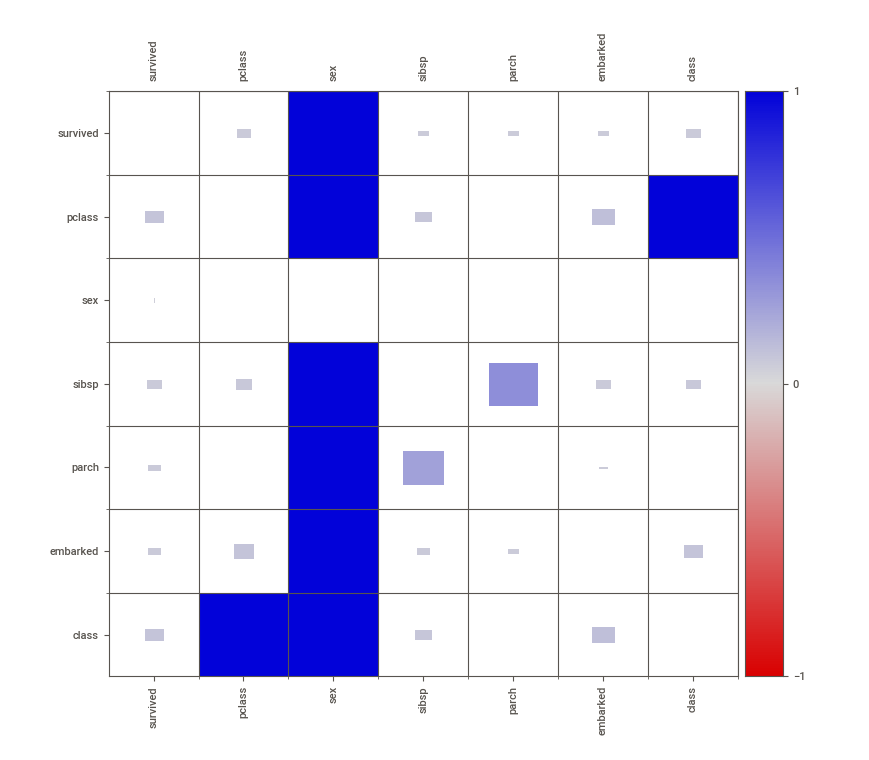
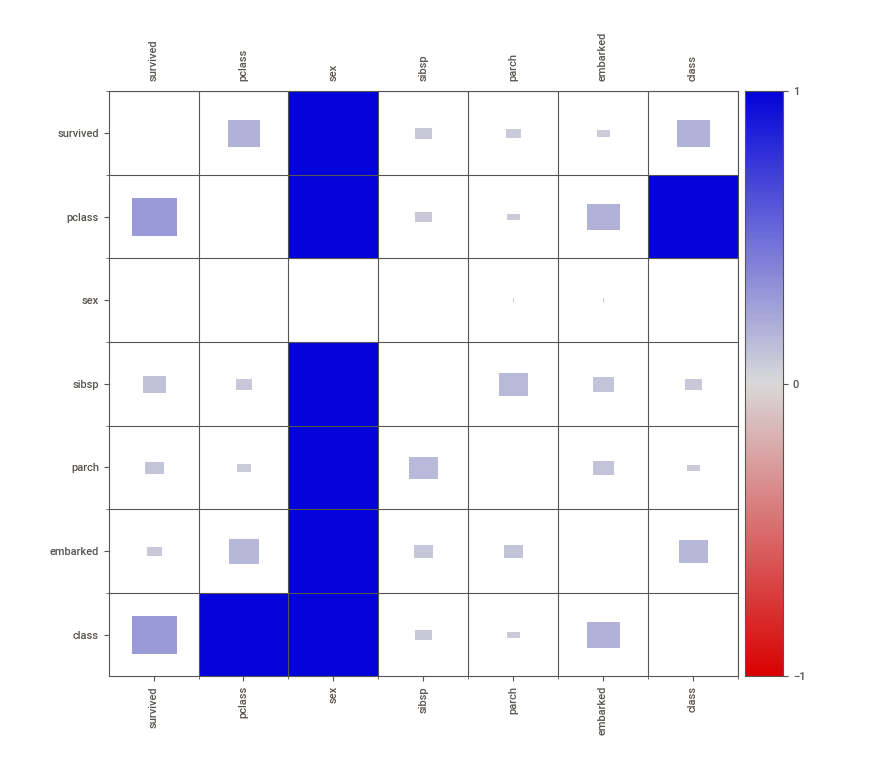

In [20]:
my_report.show_notebook(scale=0.9)

## [dataprep](https://www.kaggle.com/code/andreshg/automatic-eda-libraries-comparisson)

In [23]:
!pip install dataprep

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 42.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to re

In [2]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

In [3]:
import seaborn as sns

df = sns.load_dataset('titanic') # 타이타닉 데이터 받아오기

In [4]:
plot(df)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
create_report(df)

Output hidden; open in https://colab.research.google.com to view.